# Speech Understanding 
# Lecture 6: Pure Tones


### Mark Hasegawa-Johnson, KCGI

It's time to start talking about sound!  Today, we will talk about pure tones, a.k.a. sines and cosines.

1. [How sound is stored on a computer](#section1)
1. [Frequency](#section2)
1. [Aliasing](#section3)
1. [Phase](#section4)
1. [homework](#homework)

<a id="section1"></a>

## 1 How sound is stored on a computer

A **pure tone** is air pressure, voltage, or just a sequence of numbers that varies as a sine or cosine.  

For example, <a href="https://en.wikipedia.org/wiki/A440_(pitch_standard)">A440</a> (the international standard for tuning a piano) has the piano string vibrating as

$$x(t) = \cos\left(2\pi 440 t\right)$$
where 
* $x(t)$ is position of the string (in millimeters)
* $t$ is time (in seconds)
* $2\pi$ is the number of $\frac{\text{radians}}{\text{cycle}}$
* $440$ is the number of $\frac{\text{cycles}}{\text{second}}$


Sound is stored on a computer by measuring its amplitude once every $T_s$ seconds, where $T_s=\frac{1}{F_s}$ is the sampling period.  

For example, suppose that we sample $x(t)$ once every $F_s=8000$ samples/second, in order to create a numpy vector $x[n]$ that we can store on the computer.  The result would be:

$$x[n] = \cos\left(2\pi 440\left(\frac{n}{8000}\right)\right)$$

In [1]:
import numpy as np

x = np.zeros(8000)
for n in range(len(x)):
    x[n] = np.cos(2*np.pi*440*n/8000)
    

In [2]:
import IPython.display
IPython.display.Audio(data=x, rate=8000)

We can do the same thing without the `for` loop by using `np.arange`:

In [3]:
n = np.arange(8000)
y = np.cos(2*np.pi*440*n/8000)
IPython.display.Audio(data=y, rate=8000)

<a id="section2"></a>

## 2. Frequency

Every digitized tone is defined by two types of frequency:

* $f$ is the **frequency** of the tone, in Hertz (=cycles/second)
* $F_s$ is the **sampling frequency**, in samples/second

The tone signal itself can be most easily written as $x[n]=\cos(\omega n)$, where:

* $\omega$ (omega) is the **radial frequency**, in radians/sample, defined as:

$$\omega \left[\frac{\text{radians}}{\text{sample}}\right]=2\pi\left[\frac{\text{radians}}{\text{cycle}}\right]\times \frac{f\left[\frac{\text{cycles}}{\text{second}}\right]}{F_s\left[\frac{\text{samples}}{\text{second}}\right]}$$

This formula, $\omega=2\pi f/F_s$, is worth memorizing.

In [4]:
f = 440
Fs = 8000
omega = 2*np.pi * f/Fs
n = np.arange(Fs)

x = np.cos(omega * n)

IPython.display.Audio(data=x, rate=Fs)

If you are interested in music, you may already know that:

* The frequency $f=440$Hz (Hertz=cycles/second) is the international standard for piano tuning.  It defines the A note above middle C on a piano.
* Setting $f\leftarrow 2f$ raises the tone by one octave.  

From these two facts, you can deduce that the A notes on the piano are at the following frequencies: 55Hz, 110Hz, 220Hz, 440Hz, 880Hz, 1760Hz, 3520Hz.

In [5]:
Fs = 8000
n = np.arange(Fs)
x = np.zeros(0)

for f in [110,220,440,880,1760]:
    x = np.concatenate((x, np.cos(2 * np.pi * f * n / Fs)))
    
IPython.display.Audio(data = x, rate=Fs)

There are 12 semitones (half-notes) in an octave.  The frequency of each one is $G$ times larger than the one below it.  After 12 steps, you complete one octave, therefore:

$$G^{12} = 2$$

The number $G$ is therefore the 12th root of 2, which can be written as:

$$G=2^{1/12}$$

In [6]:
G = np.power(2,1/12)
f = 440
Fs = 8000
x = np.zeros(0)

for step in [0,1,2,3,4,5,6,7,8,9,10,11,12,13]:
    f = 440 * np.power(G, step)
    note = np.cos(2 * np.pi * f * n / Fs)
    x = np.concatenate((x, note))
    
IPython.display.Audio(data = x, rate=Fs)

<a id="section3"></a>

## 3. Aliasing

Let's try plotting our A440 pure tone:

In [7]:
import matplotlib.pyplot as plt

n = np.arange(8000)
f = 440
Fs = 8000
omega = 2*np.pi*f/Fs
x = np.cos(omega*n)


fig = plt.figure(figsize=(14,4))
subfig = fig.subplots()
subfig.stem(x)


<Container object of 3 artists>

Why can't we see anything?

The problem is that, since this is a 1-second tone, there are $f=440$ complete cycles.  That's too many for us to be able to see.

Let's adjust the duration so that it is just $1/440$ of a second.

* $N$ is the duration, in samples. 

$$N\left[\text{samples}\right]=\left(\text{duration in seconds}\right) \times F_s\left[\frac{\text{samples}}{\text{second}}\right]$$

Thus, for example, $N=8000/440$ is a little bit less than 20 samples:

In [8]:
f = 440
Fs = 8000

N = (1/440) * Fs
print("N is",N)
n = np.arange(N)

omega = 2*np.pi*f/Fs
x = np.cos(omega*n)

fig = plt.figure(figsize=(14,4))
subfig = fig.subplots()
subfig.stem(x)


N is 18.18181818181818


<Container object of 3 artists>

That's kind of cool!  Let's plot the same $1/44$ second, but using $f=880$Hz, $f=1760$Hz, and $f=3520$Hz tones:

In [9]:
fig = plt.figure(figsize=(14,6))
subfigs = fig.subplots(3,1)
subfigs[0].stem(np.cos(2*np.pi*880*n/Fs))
subfigs[1].stem(np.cos(2*np.pi*1760*n/Fs))
subfigs[2].stem(np.cos(2*np.pi*3520*n/Fs))


<Container object of 3 artists>

There's something important going on in the last plot.  Notice that

* $F_s=8000$ samples/second, but
* $f=3520$ cycles/second

Therefore we have almost **one complete cycle every two samples.**  As a result, it looks like the value is just going up and down.

Let's look at this more systematically.  Let's show just $N=4$ samples, with $\omega = \frac{2\pi k}{4}$ radians/sample, for every value of $k$ in the range $0\le k\le 4$.

In [10]:
N = 4
n = np.arange(5)

fig = plt.figure(figsize=(14,8))
subfigs = fig.subplots(5,1)

for k in range(5):
    omega = 2 * np.pi * k / N
    subfigs[k].stem(np.cos(omega * n))
    subfigs[k].set_ylabel('%d periods'%(k))

Notice that:

* $\cos(0 n)=1$. 
* $\cos(2\pi n/4)$ is just a regular cosine, everything is fine.
* $\cos(4 \pi n/4)$ is actually alternating values, between $+1$ and $-1$
* $\cos(6\pi n/4)=\cos(2\pi n/4)$ -- they are the same signal!!!
* $\cos(8\pi n/4)=\cos(0\pi n/4)$ -- they are the same signal!!!

This is called **aliasing**.

#### Aliasing Definition

If $|\omega|>\pi$, then the signals $\cos(\omega n)$ and $\sin(\omega n)$ are **exactly the same signal** as some other signal with a lower frequency.  We say that the high-frequency signal gets **aliased** to the low-frequency signal.

$$\cos(\omega n) = \cos((2\pi-\omega)n)$$

$$\sin(\omega n) = -\sin((2\pi-\omega)n)$$

We can see how that happens if we repeat the above plot, but with two different time axes: 

* Let's use $n$ to be a set of integers between 0 and 4
* Let's use $t$ to be a set of 400 real numbers, linearly spaced between 0 and 4

In [11]:
N = 4
n = np.arange(5)
t = np.linspace(0,N,400)

fig = plt.figure(figsize=(14,8))
subfigs = fig.subplots(5,1)

for k in range(5):
    omega = 2 * np.pi * k / N
    subfigs[k].stem(np.cos(omega * n))
    subfigs[k].plot(t, np.cos(omega * t))
    subfigs[k].set_ylabel('%d periods'%(k))

Now that we know about aliasing, let's hear what it sounds like.  Let's create a sequence of tones at 1000, 2000, 3000, 4000, 5000, 6000, and 7000Hz. 

Because of aliasing, it will **sound like** the tones are at 1000, 2000, 3000, 4000, 3000, 2000, and 1000Hz.

In [12]:
Fs = 8000
n = np.arange(Fs)
x = np.zeros(0)

for f in [1000,2000,3000,4000,5000,6000,7000]:
    x = np.concatenate((x, np.cos(2 * np.pi * f * n / Fs)))
    
IPython.display.Audio(data = x, rate=Fs)

How can we solve aliasing?

We can solve aliasing by increasing $F_s$!  

**To avoid aliasing: Whatever is the highest $f$ you want to use, make sure $F_s \ge 2f$**

In [13]:
Fs = 16000
n = np.arange(Fs)
x = np.zeros(0)

for f in [1000,2000,3000,4000,5000,6000,7000]:
    x = np.concatenate((x, np.cos(2 * np.pi * f * n / Fs)))
    
IPython.display.Audio(data = x, rate=Fs)

<a id="section4"></a>

## 4.  Phase

So far, we've been using only cosines.   Why?

The answer is: **humans can't hear the difference between a cosine and a sine wave**.  The way we usually say this is:  **we can't hear phase**.

### 4.1 A sine is just a cosine with a phase shift:

First of all, let me prove to you that

$$\sin\left(\omega n\right) = \cos\left(\omega n-\frac{\pi}{2}\right)$$



In [14]:
N = 4
t = np.linspace(0,N,400)
omega = 2 * np.pi * k / N

fig = plt.figure(figsize=(14,8))
subfigs = fig.subplots(5,1)

for k in range(5):
    theta = - np.pi * k / 4
    subfigs[k].plot(t, np.cos(omega * t + theta))
    subfigs[k].set_ylabel('θ = -%dπ/4'%(k))

### 4.2 The human ear can't even hear phase.  

Second, let's prove that **humans can't hear phase**.

Let's create signals $x[n] = \cos(\omega n +\theta)$ with the same $\omega$, but different $\theta$.

It will turn out that they all sound exactly the same.

In [15]:
Fs = 8000
n = np.arange(Fs)
x = np.zeros(0)
f = 440
omega = 2 * np.pi * f / Fs

x = np.zeros(0)
for k in range(5):
    theta = - np.pi * k / 4
    x = np.concatenate((x, np.cos(omega * n + theta)))
    x = np.concatenate((x, np.zeros(Fs)))
    
IPython.display.Audio(data = x, rate=Fs)

<a id="homework"></a>

## Homework 6

Homework will be graded on github.com.

In this directory, there is a file called `homework6.py`.  It contains 3 functions.  Complete those functions, run the autograder block at the end of this notebook, commit your changed notebook, and push it to github.

### Homework Problem 6.1

In [16]:
import homework6, importlib
importlib.reload(homework6)
help(homework6.minimum_Fs)

Help on function minimum_Fs in module homework6:

minimum_Fs(f)
    Find the lowest sampling frequency that would avoid aliasing for a pure tone at f Hz.
    
    @param:
    f (scalar): frequency in Hz (cycles/second)
    
    @result:
    Fs (scalar): the lowest sampling frequency (samples/second) that would
    not cause aliasing at a tone of f Hz.



Remember that, to avoid aliasing, it's necessary that
$$F_s \ge 2f$$
So for example, the lowest $F_s$ for a tone at $f=440$ should be 
`Fs =  880`:

In [17]:
import homework6, importlib
importlib.reload(homework6)
print('Fs = ',homework6.minimum_Fs(440))

Fs =  880


### Homework Problem 6.2

In [18]:
importlib.reload(homework6)
help(homework6.omega)

Help on function omega in module homework6:

omega(f, Fs)
    Find the radial frequency (omega) that matches a given f and Fs.
    
    @param:
    f (scalar): frequency in Hz (cycles/second)
    Fs (scalar): sampling frequency in samples/second
    
    @result:
    omega (scalar): radial frequency in radians/sample



Remember that
$$\omega = \frac{2\pi f}{F_s}$$

So for example, if $f=1000$ and $F_s=8000$, then you should get $\omega=\frac{\pi}{4}\approx 0.785$:

In [19]:
import homework6, importlib
importlib.reload(homework6)

print('omega =',homework6.omega(1000,8000))


omega = 0.7853981633974483


### Homework Problem 6.3

In [20]:
importlib.reload(homework6)
help(homework6.pure_tone)

Help on function pure_tone in module homework6:

pure_tone(omega, N)
    Create a pure tone of N samples at omega radians/sample.
    
    @param:
    omega (scalar): radial frequency, samples/second
    N (scalar): duration of the tone, in samples
    
    @result:
    x (array): N samples from the signal cos(omega*n)



For example, the following block should produce a plot showing one period (19 samples) of a 440Hz cosine sampled at 8000 samples/second:

TypeError: object of type 'int' has no len()

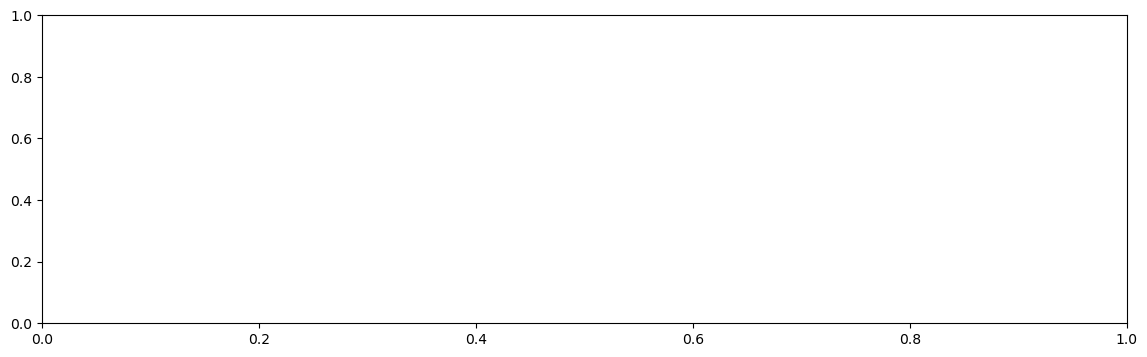

In [21]:
import homework6, importlib
importlib.reload(homework6)

x = homework6.pure_tone(2*np.pi*440/8000, int(8000/440))

fig = plt.figure(figsize=(14,4))
subfig = fig.subplots(1,1)
subfig.stem(x)


### Receiving your grade

In order to receive a grade for your homework, you need to:

1. Run the following code block on your machine.  The result may list some errors, and then in the very last line, it will show a score.  That score (between 0% and 100%) is the grade you have earned so far.  If you want to earn a higher grade, please continue editing `homework3.py`, and then run this code block again.
1. When you are happy with your score (e.g., when it reaches 100%), choose `File` $\Rightarrow$ `Save and Checkpoint`.  Then use `GitHub Desktop` to commit and push your changes.
1. Make sure that the 100% shows on your github repo on github.com.  If it doesn't, you will not receive credit.

In [22]:
import importlib, grade
importlib.reload(grade)

FEEE
ERROR: test_omega (grade.Test)
----------------------------------------------------------------------
Traceback (most recent call last):
  File "/Users/jhasegaw/Dropbox/mark/teaching/kcgi/intro_speech_understanding/2023_fall/lec06/grade.py", line 12, in test_omega
    self.assertAlmostEqual(omega,np.pi/4,'omega should be 2πf/Fs, not %g'%(omega))
  File "/Users/jhasegaw/anaconda3/lib/python3.10/unittest/case.py", line 890, in assertAlmostEqual
    if round(diff, places) == 0:
TypeError: 'str' object cannot be interpreted as an integer

ERROR: test_pure_tone_duration (grade.Test)
----------------------------------------------------------------------
Traceback (most recent call last):
  File "/Users/jhasegaw/Dropbox/mark/teaching/kcgi/intro_speech_understanding/2023_fall/lec06/grade.py", line 18, in test_pure_tone_duration
    self.assertEqual(len(x),N,'pure_tone length should be %d not %d'%(N,len(x)))
TypeError: object of type 'int' has no len()

ERROR: test_pure_tone_value (grade.T

0 successes out of 4 tests run
Score: 0%
0 successes out of 4 tests run
Score: 0%


<module 'grade' from '/Users/jhasegaw/Dropbox/mark/teaching/kcgi/intro_speech_understanding/2023_fall/lec06/grade.py'>